# **Case study: Customer Segmentaion** 
<br>
 Prepaired by: Yunus Teli
 Email: yunus.teli55@gmail.com

### <b> Data Description: </b>

#### <b>Attribute Information: </b>

* #### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* #### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* #### Description: Product (item) name. Nominal.
* #### Quantity: The quantities of each product (item) per transaction. Numeric.
* #### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* #### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* #### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* #### Country: Country name. Nominal, the name of the country where each customer resides.

**Dataset Link:** https://drive.google.com/file/d/1nCwyLb5mTuouiigvi6sbNBT91W3MLUtF/view?usp=sharing

### **Import the libraries and the dataset to understand the variables present:**

In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the libraries
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [18,7]
sns.set(rc={'figure.figsize':(18,7)})

C:\Users\Smart\AppData\Local\Temp\ipykernel_13760\1841208140.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\Smart\AppData\Local\Temp\ipykernel_13760\1841208140.py:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [3]:
df = pd.read_csv(r'C:\Users\Smart\OneDrive\Desktop\ML_projects_practice\Online Retail.csv')

In [4]:
# First look of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
# Last look of dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [6]:
# Size of dataset
len(df)

541909

In [7]:
# Shape of dataset
df.shape

(541909, 8)

In [8]:
# columns of dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
# dataytpes of  Features columns
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## **Data Summary:**

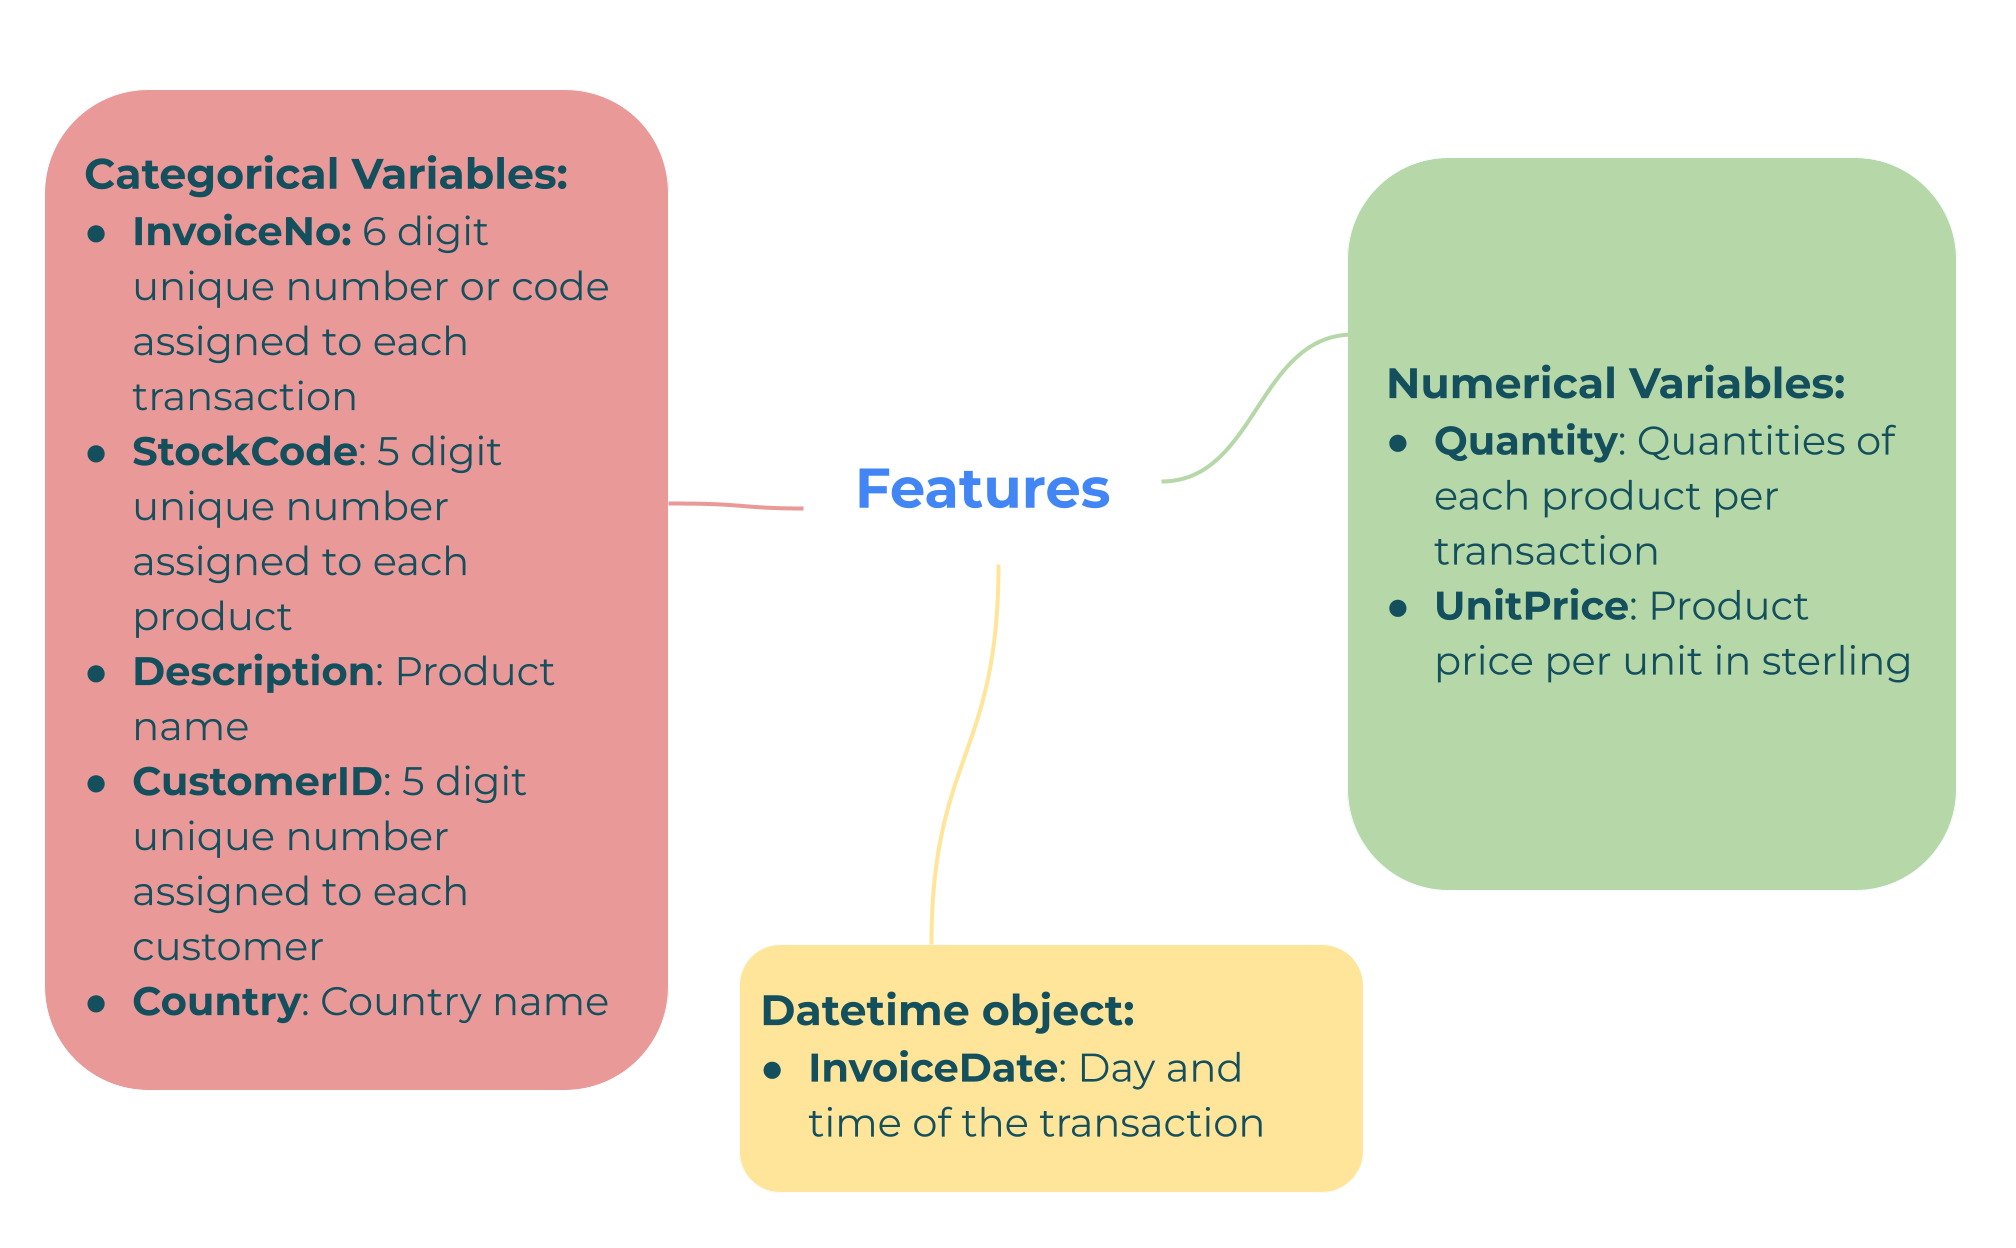

### **Information/Description of the Data:**

In [10]:
# check information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
# description of the dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


---
- from above dataset description we can analyze that min of 'Quantity ' and 'UnitPrice' show negative values, which means that some  products are cancelled, that's why it shows negative value we will further analyze  the data to understand how many items were cancelled.
- CustomerID have some null values which show in the count rows their is count difference with the other columns .
- We also see that there is a the distribution of Quantity and UnitPrice looks to be skewed as there's a huge difference between the 75th percentile and the maximum value.
----

In [12]:
# Checking with duplicate values
df.duplicated().sum()

5268

In [13]:
# Checking with null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* There are 5268 duplicated records present in the data and few missing values present in Description and CustomerID columns.

In [14]:
# Drop duplicated and null rows from the dataset
df.drop_duplicates(inplace= True) 
df.dropna(inplace= True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df.shape

(401604, 8)

* We have treated the missing values and the duplicated records. After removal of these values, the shape of our dataset is (401604, 8).

* We will now check for the cancelled orders.

In [18]:
# check for order cancellation
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df[df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [19]:
# consider only the non cancelled orders
df = df[~df['InvoiceNo'].str.startswith('C')]
# check the shape of the data after removing cancelled orders
df.shape

(392732, 8)

In [20]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


* There are no negative values in the Quantity and UnitPrice column now.

* But we can still see a minimum value of 0 in the UnitPrice column which cannot be real as a store cannot sell items for free.

* We will investigate this column and remove those records.

In [21]:
df[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/10 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/10 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/10 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/11 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/11 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/11 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/11 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/11 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/11 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/11 14:42,0.0,14410.0,United Kingdom


In [22]:
# only consider UnitPrice greater than zero
df = df[df['UnitPrice'] > 0]

In [23]:
df.shape

(392692, 8)

In [24]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


* Our dataset is almost a cleaned one now and we can move to EDA but before that we can create some additional features for our dataset.

#### Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

### **Let us create some new features (Feature Engineering):**

In [25]:
# convert invoicedate column into datetime format
# df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M') 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%y %H:%M')


In [26]:
df['day'] = df['InvoiceDate'].dt.day_name()
df['month'] = df['InvoiceDate'].dt.month_name()
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['month_num'] = df['InvoiceDate'].apply(lambda x: x.month)
df['day_num'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['minute'] =  df['InvoiceDate'].apply(lambda x: x.minute)

In [27]:
# create TotalAmount from Quantity and UnitPrice
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [28]:
# top 5 rows of the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,month_num,day_num,hour,minute,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34


### **Exploratory Data Analysis:**


#### We will be discovering insights like:

  * Which products are the most and least sold ones?

  * Which countries has the most and least number of customers?

  * Distribution of the numerical features.

  * Which day had the most and least number of purchases?

  * Which month had the most and least number of purchases?

  * Which hour in a day had the most and least number of purchases?

#### **Which products are the most sold ones?**

In [29]:
desc_df = df['Description'].value_counts().reset_index()
desc_df

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389
...,...,...
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1


In [30]:
# desc_df = df['Description'].value_counts().reset_index()
# desc_df.rename(columns={'index': 'Description Name'}, inplace=True)
# desc_df.rename(columns={'Description': 'Count'}, inplace=True)
desc_df.head()

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


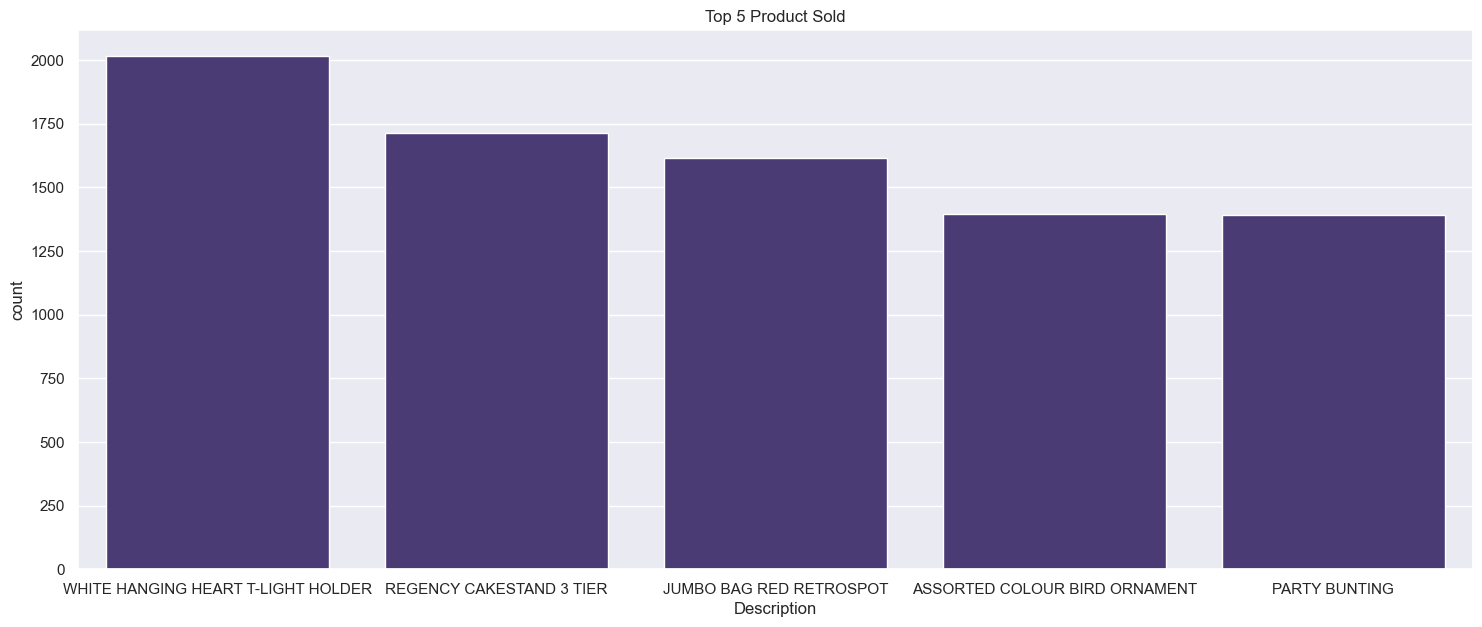

In [31]:
sns.set_palette("viridis")
sns.barplot(x = 'Description', y = 'count', data= desc_df[:5])
plt.title('Top 5 Product Sold')
plt.show()

The top 5 most sold products are:

1. White Hanging Heart T-Light Holder

2. Regency Cakestand 3 Tier

3. Jumbo Bag Red Retrospot

4. Assorted Colour Bird Ornament

5. Party Bunting

#### **Which products are the least sold ones?**

In [32]:
# bottom 5 products
desc_df.tail()

,Description,count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


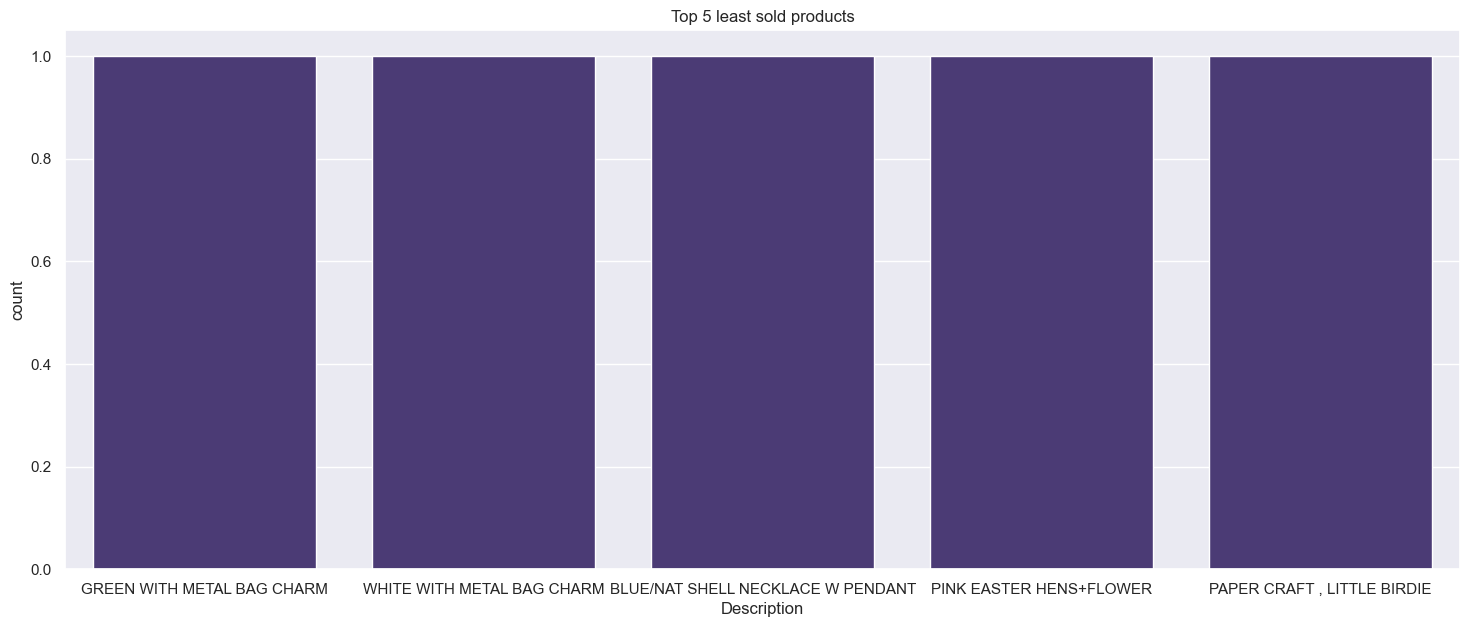

In [33]:
sns.barplot(x='Description', y='count', data=desc_df[-5:])
plt.title('Top 5 least sold products')
plt.show()

The top 5 least sold products are:

1. Green with Metal Bag Charm

2. White with Metal Bag Charm

3. Blue/Nat Shell Necklace W Pendant

4. Pink Easter Hens + Flower

5. Paper Craft, Little Birdie

#### **Which countries has the most number of customers?**

In [34]:
# count of customers for each country

country_df = df['Country'].value_counts().reset_index()
# country_df.rename(columns={'index': 'Country Name'}, inplace=True)
# country_df.rename(columns={'Country':'Count'}, inplace=True)
country_df.head()


,Country,count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


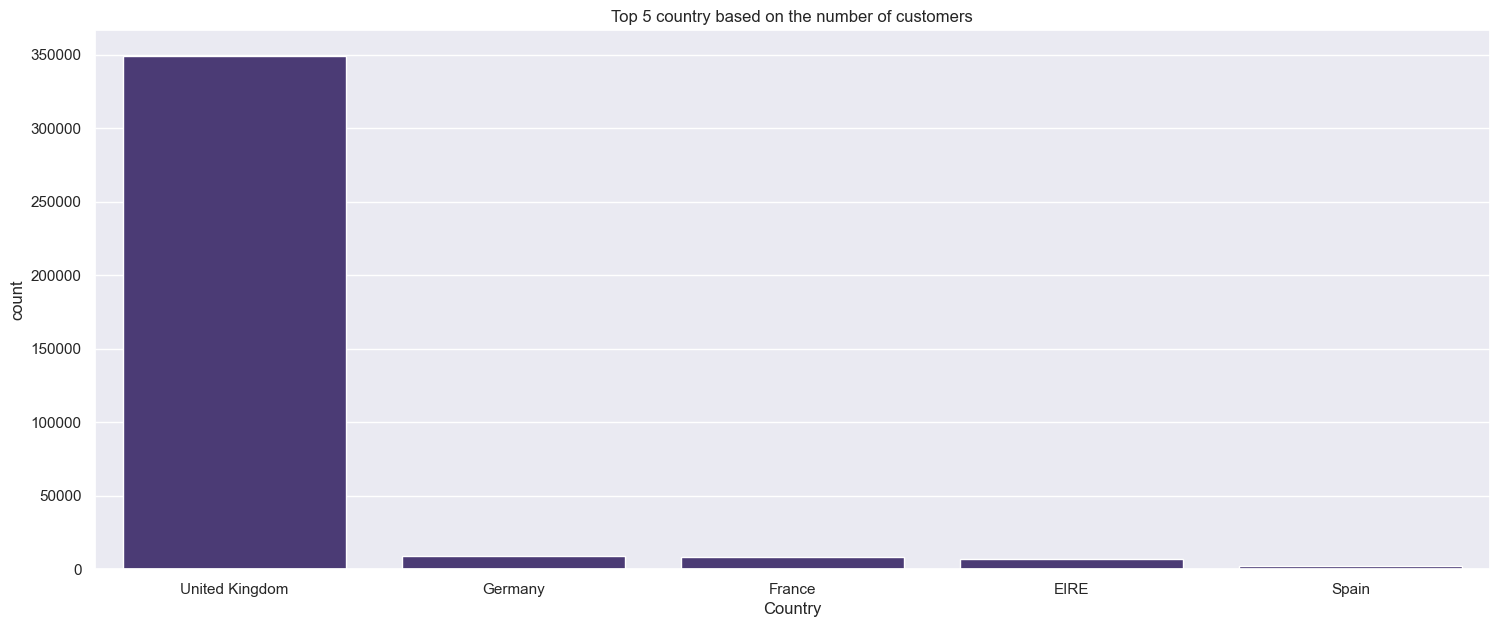

In [35]:
sns.barplot(x='Country', y='count', data=country_df[:5])
plt.title('Top 5 country based on the number of customers')
plt.show()

#### **Which countries has the least number of customers?**

In [36]:
country_df.tail()

,Country,count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


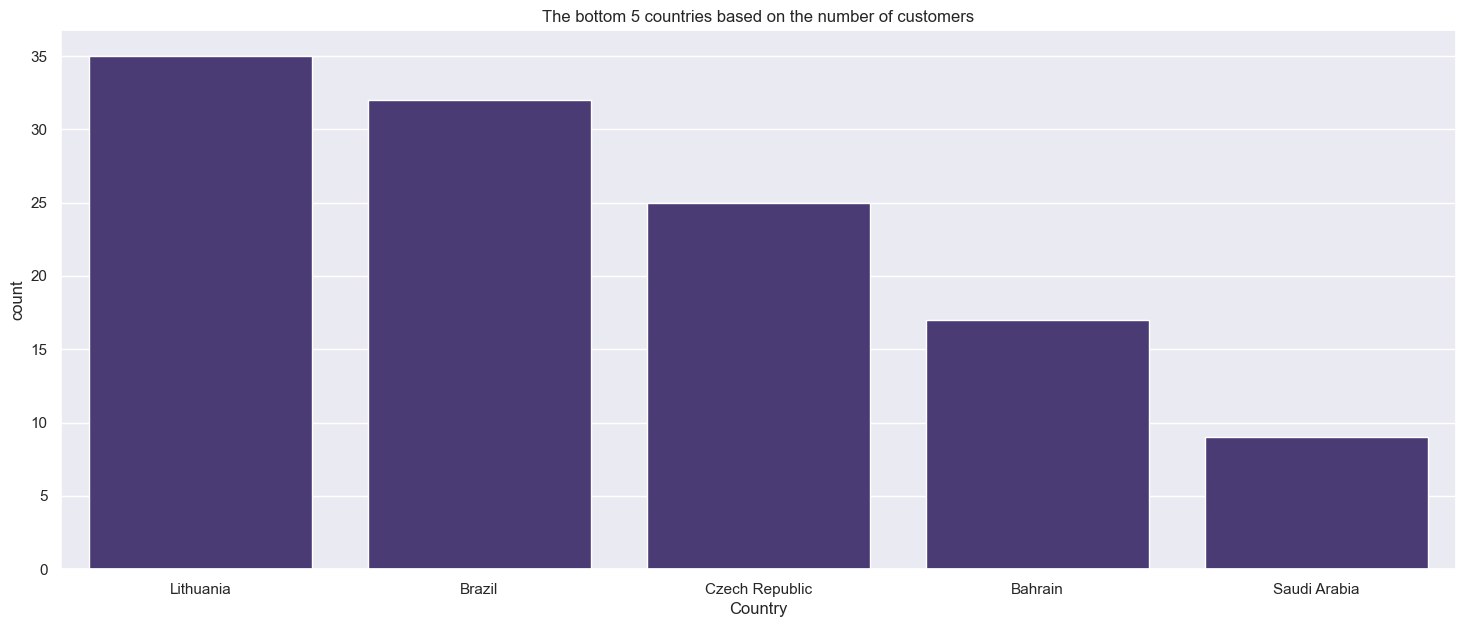

In [37]:
# plot the bottom 5 countries based on the number of customers
sns.barplot(x='Country', y='count', data=country_df[-5:])
plt.title('The bottom 5 countries based on the number of customers')
plt.show()

* Saudi Arabia has the least number of customers followed by Bahrain.

#### **How many unique customers are there?**

In [38]:
# number of unique customers
len(df['CustomerID'].unique())

4338

* There are 4338 unique customers present in the whole transactional dataset.

#### **What is the order share of the top 10 customers?**

In [39]:
# order share of top 10 customers
share_df = (df['CustomerID'].value_counts()/sum(df['CustomerID'].value_counts()) * 100).reset_index()
share_df.columns = ['Customer ID', 'Order Share']
share_df.head(10).cumsum()

,Customer ID,Order Share
0,17841.0,1.954713
1,32752.0,3.398592
2,46848.0,4.700121
3,59596.0,5.823648
4,74202.0,6.505353
5,89513.0,7.107861
6,104159.0,7.636519
7,117248.0,8.098459
8,130511.0,8.522965
9,144809.0,8.939831


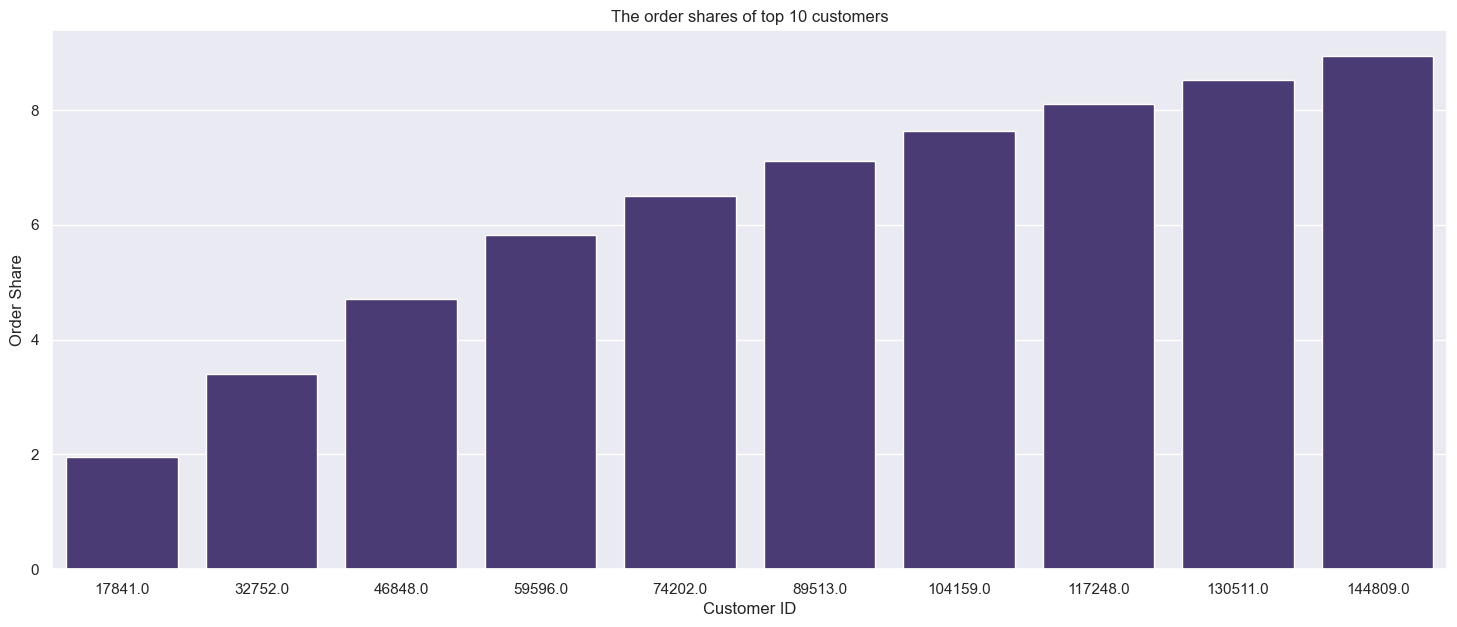

In [40]:
# plot the top 10 customer's order share
sns.barplot(x='Customer ID', y='Order Share', data=share_df[:10].cumsum())
plt.title('The order shares of top 10 customers')
plt.show()

* We can observe that only 10 customers out of 4338 unique customers are responsible for approx 9% of the total orders.

* We can infer that these customers might be wholesalers.

### **Let us check the distribution of the numerical features:**

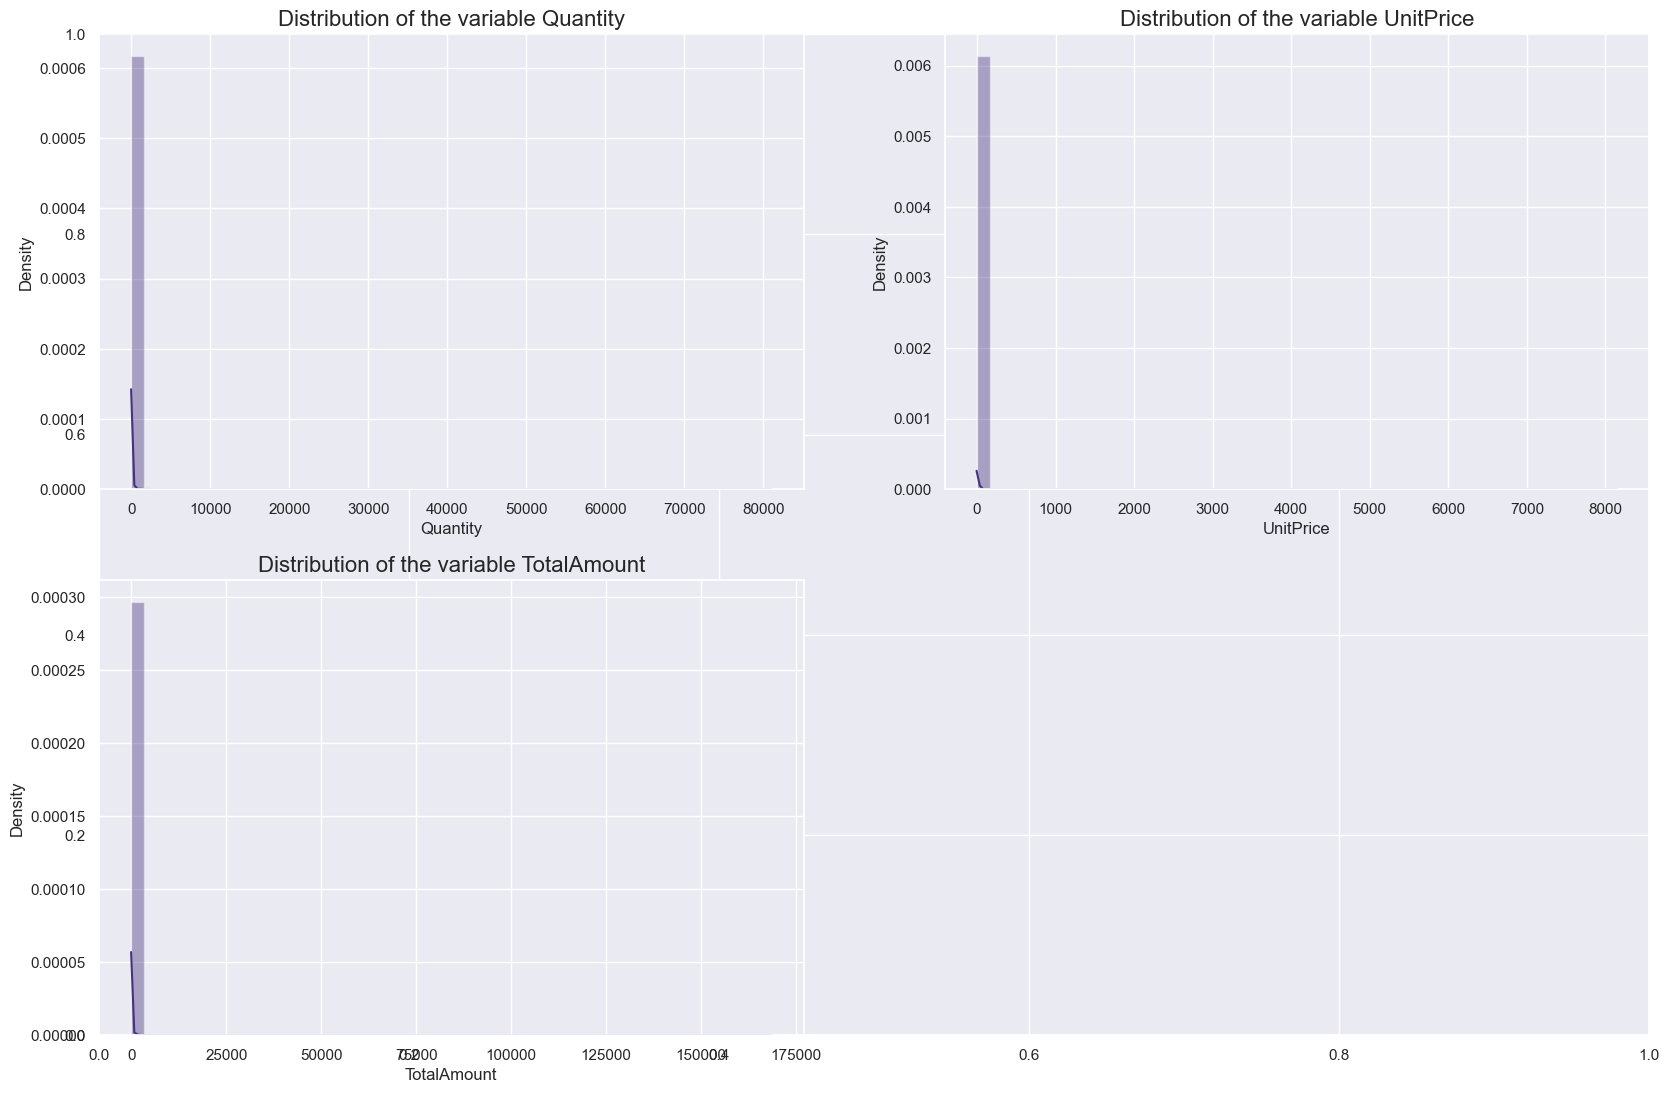

In [41]:
# plot the distribution of the numerical features
num_features = ['Quantity', 'UnitPrice', 'TotalAmount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

* The distribution of all the variables are heavily right skewed.

* We will apply log transformation on these variables to make it less skewed.

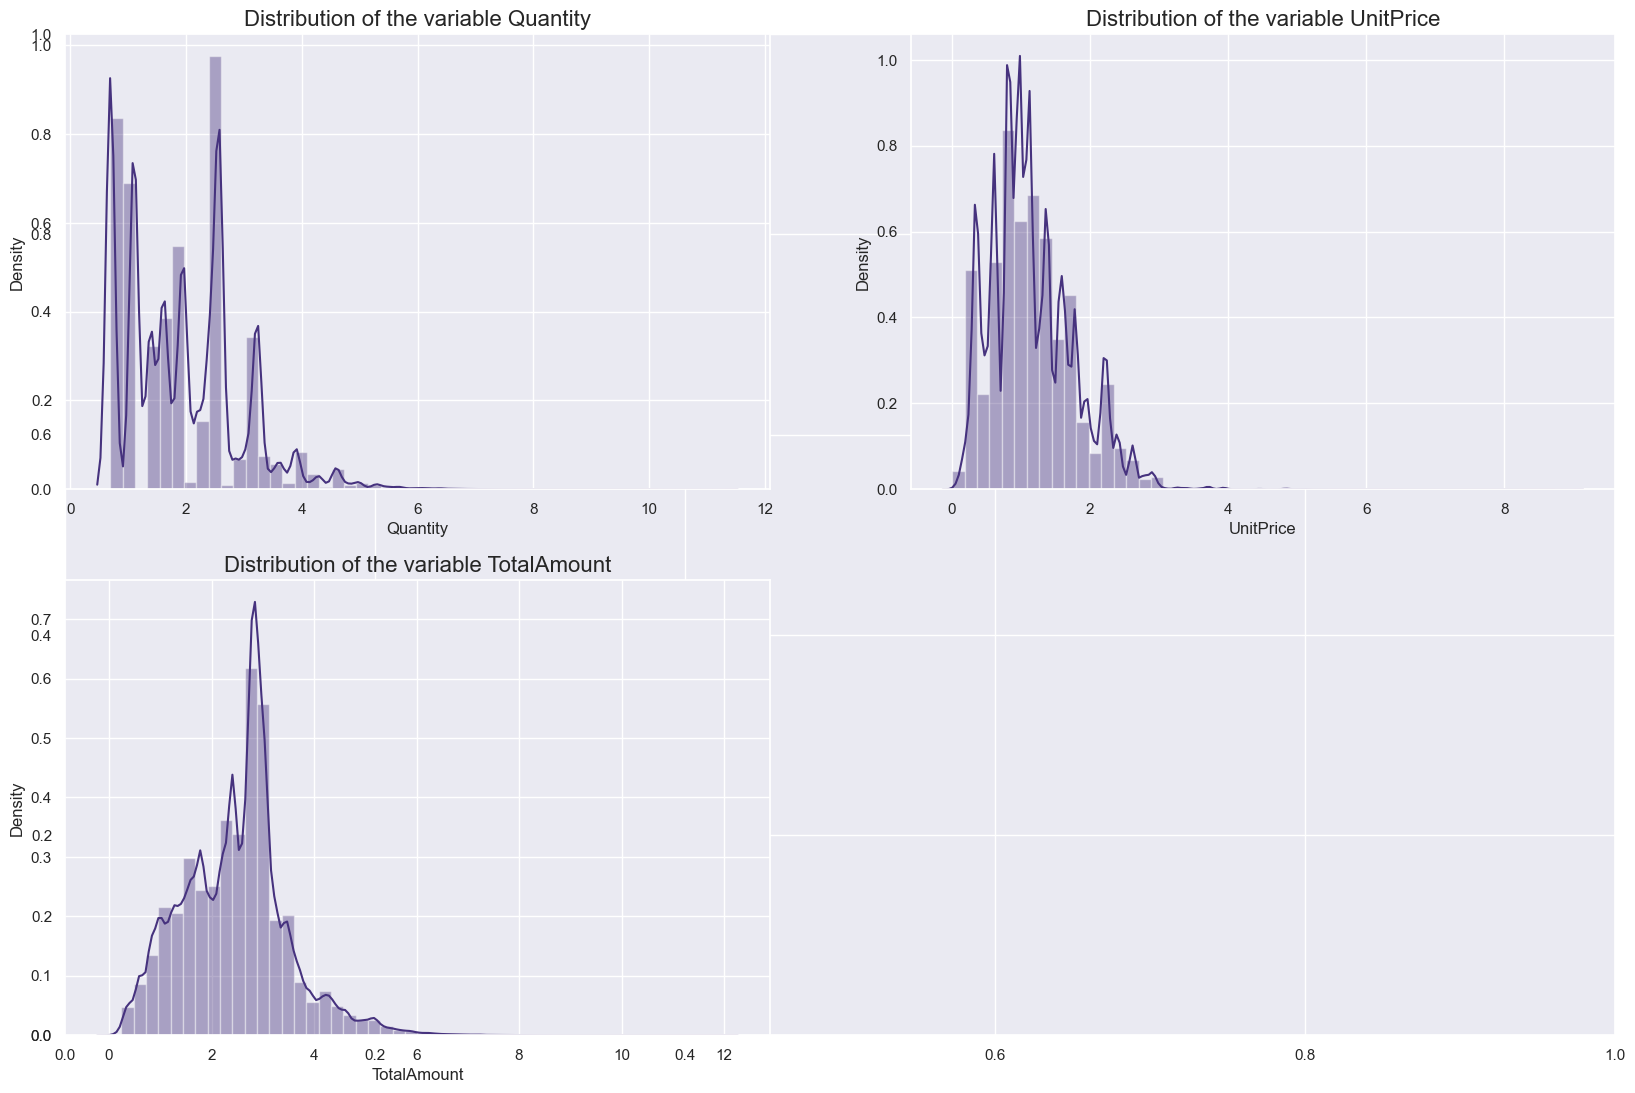

In [42]:
# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

* The variables after log transformation are less skewed than before.

* It isn't a normal distribution but somewhat close to that than before.

In [43]:
# number of purchases w.r.t the day of the week
day_df = df['day'].value_counts().reset_index()
# day_df.rename(columns={'index': 'Day Name'}, inplace=True)
# day_df.rename(columns={'day': 'Count'}, inplace=True)
day_df

,day,count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


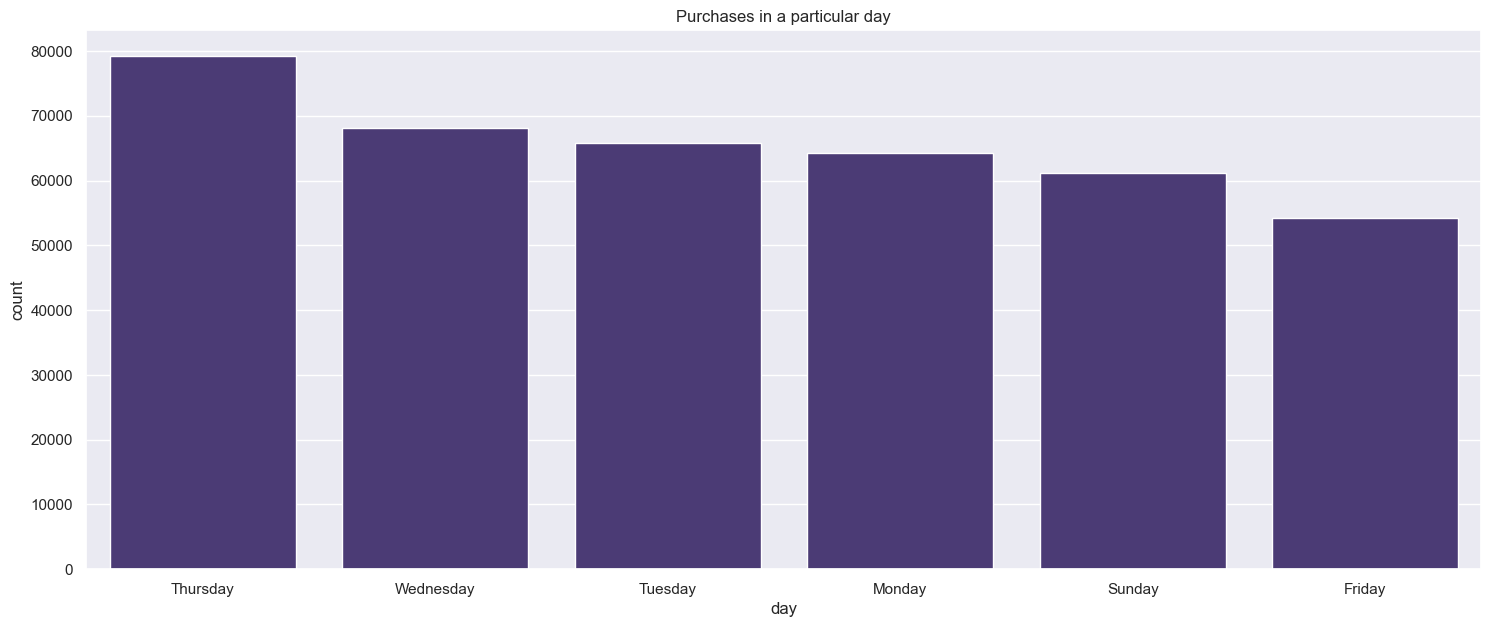

In [44]:
# plot the number of purchases w.r.t day of the week
sns.barplot(x='day', y='count', data=day_df)
plt.title('Purchases in a particular day')
plt.show()

* Most of the customers have made a purchase in Thursday followed by Wednesday.

* Friday is the day with least number of purchases made.

#### **Which month had the most and the least number of purchases?**

In [45]:
df_month = df['month'].value_counts().reset_index()
df_month

,month,count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


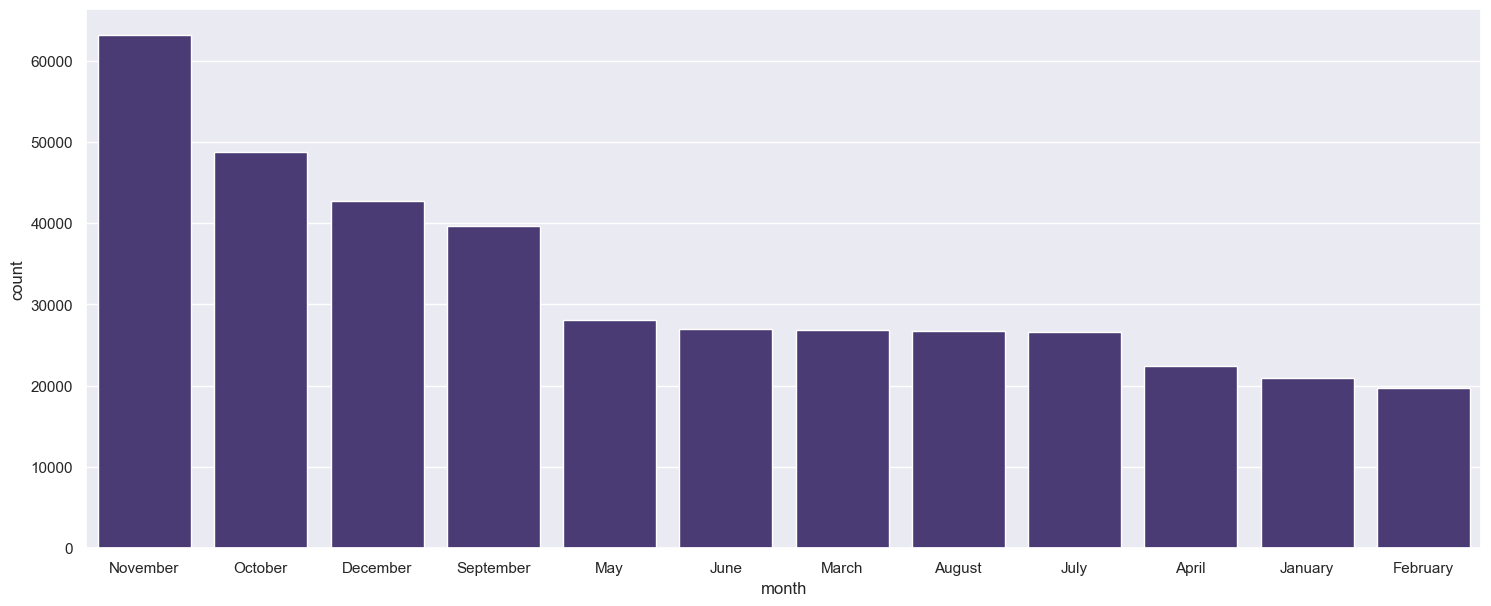

In [46]:
sns.barplot(x='month', y='count', data= df_month)
plt.show()

* The most number of purchases are made during October to December which is a festive season for many people.

* The least number of purchases are made during the initial months of a year, January and February which is quite obvious because as soon as the festive season ends, purchases or sales will go down.

#### **Which hour of the day had the most and the least number of purchases?**

In [47]:
df_hours = df['hour'].value_counts().reset_index()
df_hours

,hour,count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


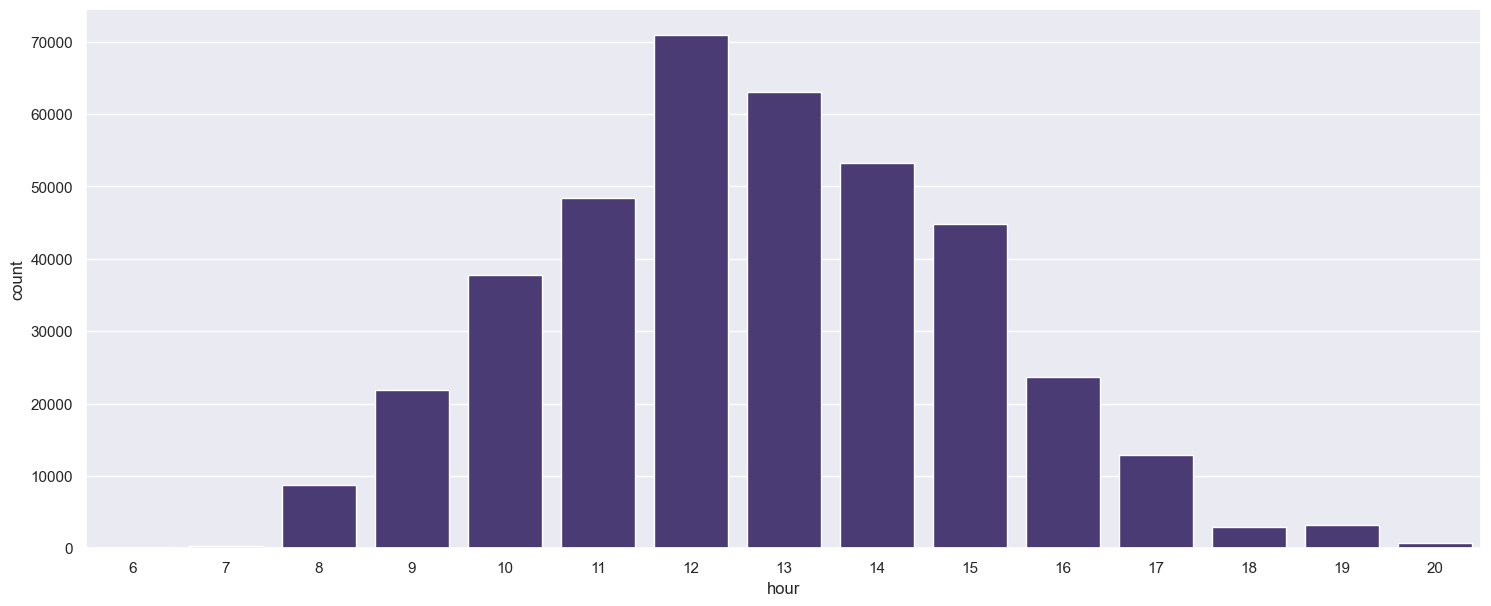

In [48]:
sns.barplot(x= df_hours['hour'], y= df_hours['count'] )
plt.show()

* Most of the purchases are around the afternoon period and a very few number of purchases during morning or evening.

* We can bucket this hour graph into morning, afternoon and evening buckets.

In [49]:
# group the time into 3 buckets
def time_day(time):
    if (time>= 6 and time<= 11):
        return  "morning"
    elif (time >= 12 and  time <=17) :
        return "afternoon"
    else: 
        return "evening"
# apply the function into the column
df['time_day']= df['hour'].apply(time_day)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,month_num,day_num,hour,minute,TotalAmount,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,15.30,morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34,morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,22.00,morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34,morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,2010,12,1,8,26,20.34,morning


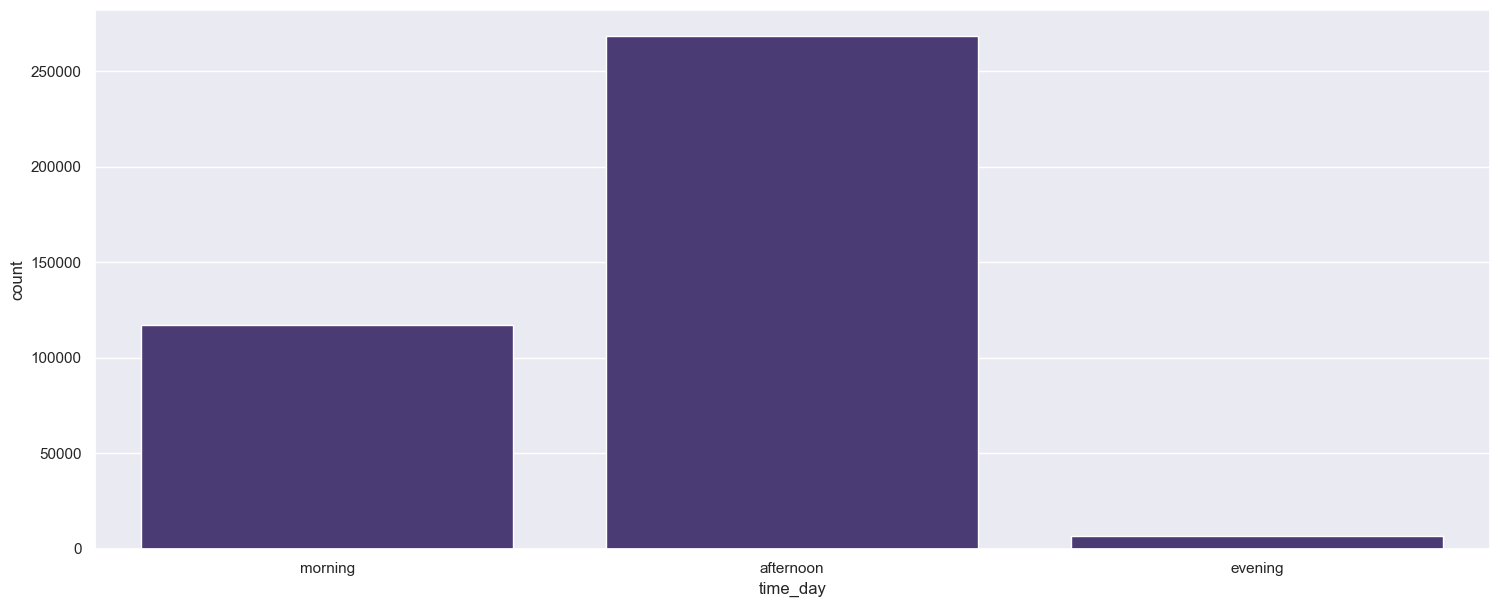

In [50]:
sns.countplot(x= 'time_day',data=df) 
# plt.xticks(rotation=45) 
plt.show()

* Now, it is more clear that most of the purchases has occurred during the Afternoon followed by Morning and the least number of purchases during Evening.


## **Let us create the RFM Model (Recency, Frequency and Monetary):**


#### Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by measuring and analyzing spending habits.

#### The RFM model is based on three quantitative factors:

1. Recency: How recently a customer has made a purchase
2. Frequency: How often a customer makes a purchase
3. Monetary Value: How much money a customer spends on purchases

#### RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

#### These three RFM factors can be used to reasonably predict how likely (or unlikely) it is that a customer will do business again with a firm or, in the case of a charitable organization, make another donation.


### **Significance of Recency, Frequency and Monetary Value:**

#### RFM analysis allows a comparison between potential contributors or clients. It gives organizations a sense of how much revenue comes from repeat customers (versus new customers), and which levers they can pull to try to make customers happier so they become repeat purchasers.

#### Despite the useful information that is acquired through RFM analysis, firms must take into consideration that even the best customers will not want to be over-solicited, and the lower-ranking customers may be cultivated with additional marketing efforts. It works as a snapshot of the clientele and as a tool to prioritize nurturing, but it should not be taken as a license to simply do more of the same-old, same-old sales techniques.

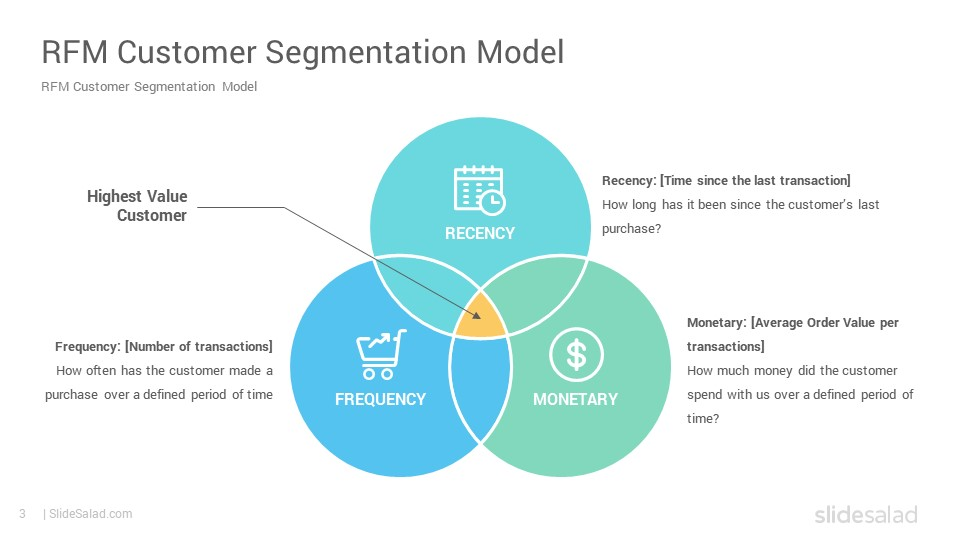

### **Performing RFM Segmentation and RFM Analysis, step by step:**

#### **Step 1:**
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. The raw data for doing this, which should be readily available in the company’s CRM or transactional databases, can be compiled in an Excel spreadsheet or database.

#### **Step 2:**
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool. Unless using specialized software, it’s recommended to divide the customers into four tiers for each dimension, such that each customer will be assigned to one tier in each dimension.

#### **Step 3:**
The third step is to select groups of customers to whom specific types of communications will be sent, based on the RFM segments in which they appear.

#### **Step 4:**
The fourth step actually goes beyond the RFM segmentation itself: crafting specific messaging that is tailored for each customer group. By focusing on the behavioral patterns of particular groups, RFM marketing allows marketers to communicate with customers in a much more effective manner.

#### **Filter UK data only:**

##### Being a UK based retail store and as most of the customers or a huge chunk of customers are from UK, we have decided to consider the UK based customers only for segmentation.

In [51]:
# filter UK data only
df = df[df['Country'] == 'United Kingdom']

# print the shape of the data
df.shape

(349203, 17)

### **Calculating FRM Score**

In [52]:
# calculating RFM scores
# set latest date to '2011-12-10' as the last invoice date was '2011-12-09'
latest_date = dt.datetime(2011,12,10)

# create rfm modeling score for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days,'InvoiceNo': lambda x: len(x),
                                       'TotalAmount': lambda x: x.sum()})

# convert invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace= True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [53]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,89.082398,1858.424654
std,99.533485,214.034542,7478.631256
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,298.185000
50%,50.000000,40.000000,644.975000
75%,142.000000,98.000000,1571.285000
max,373.000000,7676.000000,259657.300000


#### **Let us plot the distribution of Recency, Frequency and Monetary Value:**

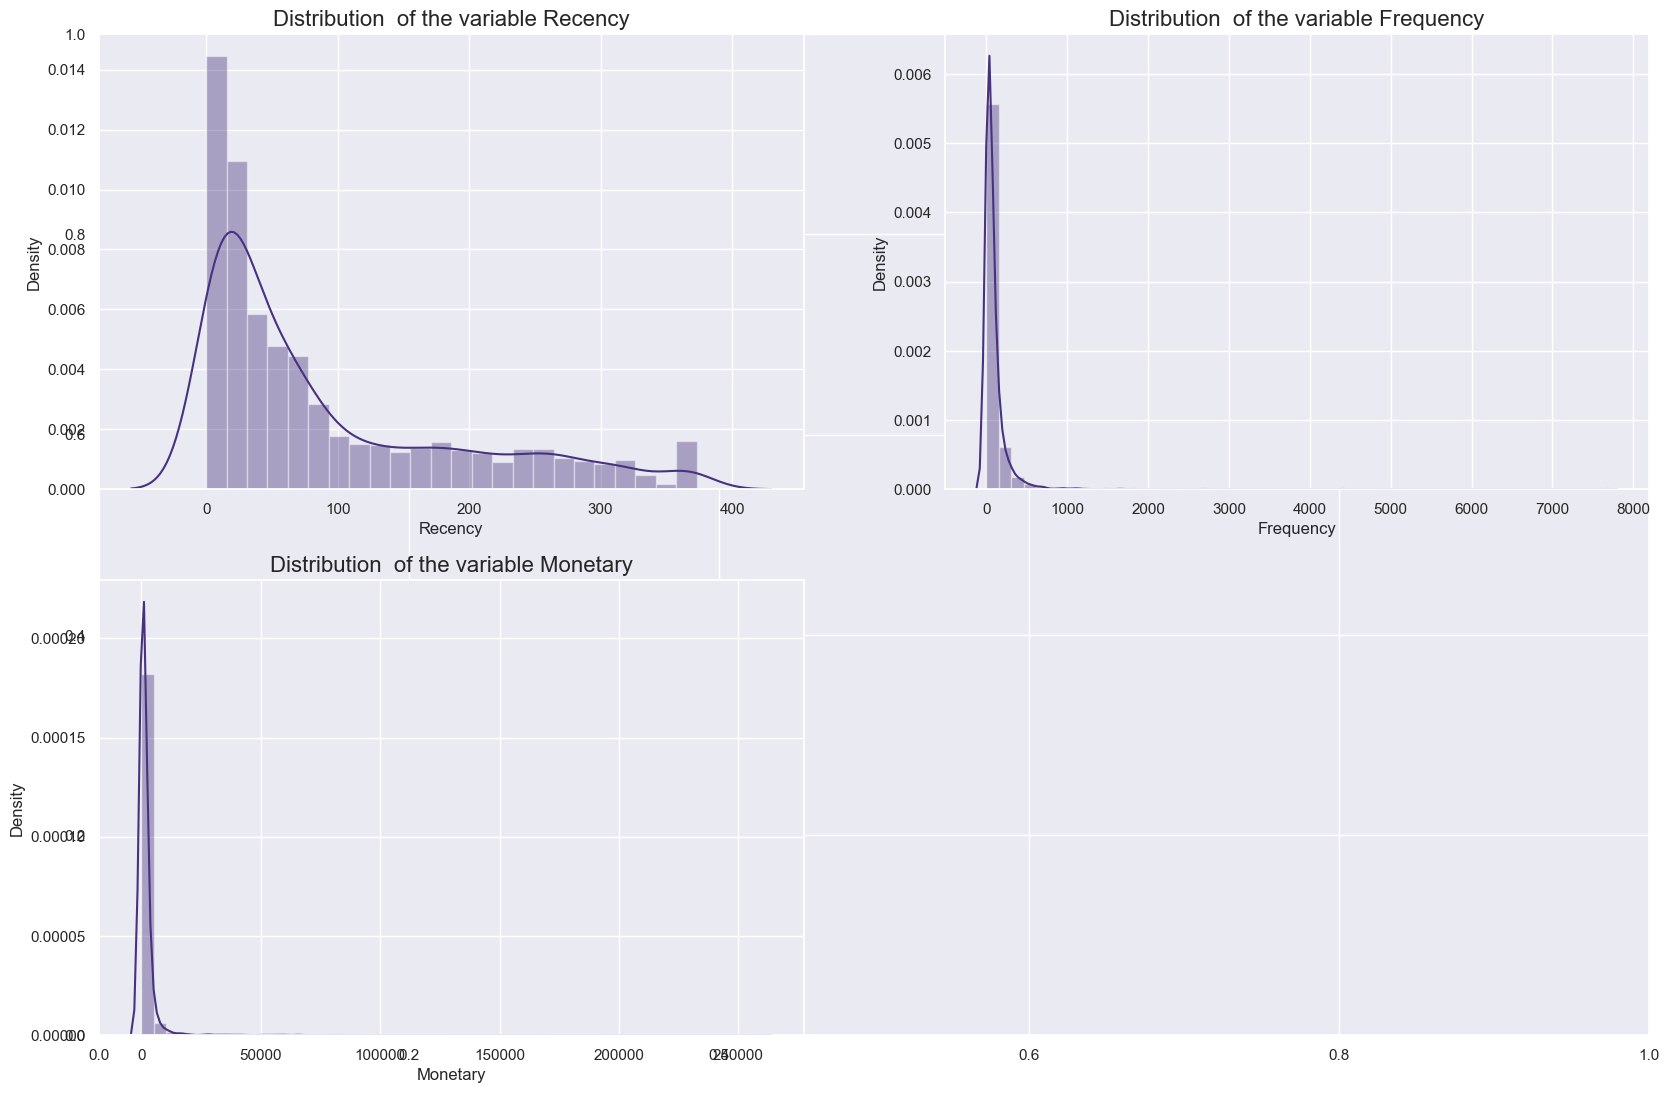

In [54]:
# plot the distribution of the RFM values
count = 1
plt.subplots(figsize= (20,13))
for feature in rfm_df:
    plt.subplot(2,2,count)
    sns.distplot(rfm_df[feature])
    plt.title(f"Distribution  of the variable {feature}", fontsize = 16)
    plt.xlabel(f"{feature}")
    plt.ylabel("Density")
    count  += 1

### **Apply log transformation to the RFM values and plot each distribution:**

Applying a log transformation in the context of RFM (Recency, Frequency, Monetary) analysis, or any data analysis task, serves several important purposes:

1. **Normalization**: RFM metrics can vary significantly in scale. For example, monetary values can range from a few dollars to thousands, while frequency might vary from 1 to hundreds of times. A log transformation helps to normalize these scales, making it easier to compare and analyze data across different scales.

2. **Handling Skewed Data**: Many datasets, especially those involving monetary values or counts (like frequency), are often right-skewed, meaning most of the data points are clustered around the lower end of the scale with a long tail extending towards higher values. Log transformation helps in reducing the skewness, making the distribution more symmetrical and closer to a normal distribution. This is beneficial because many statistical methods and machine learning algorithms assume or perform better with data that is approximately normally distributed.

3. **Reducing the Impact of Outliers**: In RFM data, you might encounter extreme values or outliers, such as very high monetary values or unusually frequent purchases. These outliers can disproportionately influence the analysis. Log transformation reduces the impact of outliers by bringing them closer to the rest of the data points, thus providing a more balanced view.


In [55]:
# treat the negative and zero values to handle infinite numbers during log transformation
def handle_negative(num):
    if num <= 0:
        return 1
    else:
        return num
    
# apply the function to recency and monetary columns
rfm_df['Recency'] = [handle_negative(x) for x in rfm_df['Recency']]
rfm_df['Monetary'] = [handle_negative(x) for x in rfm_df['Monetary']]

# apply log transfomation to RFM values
log_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

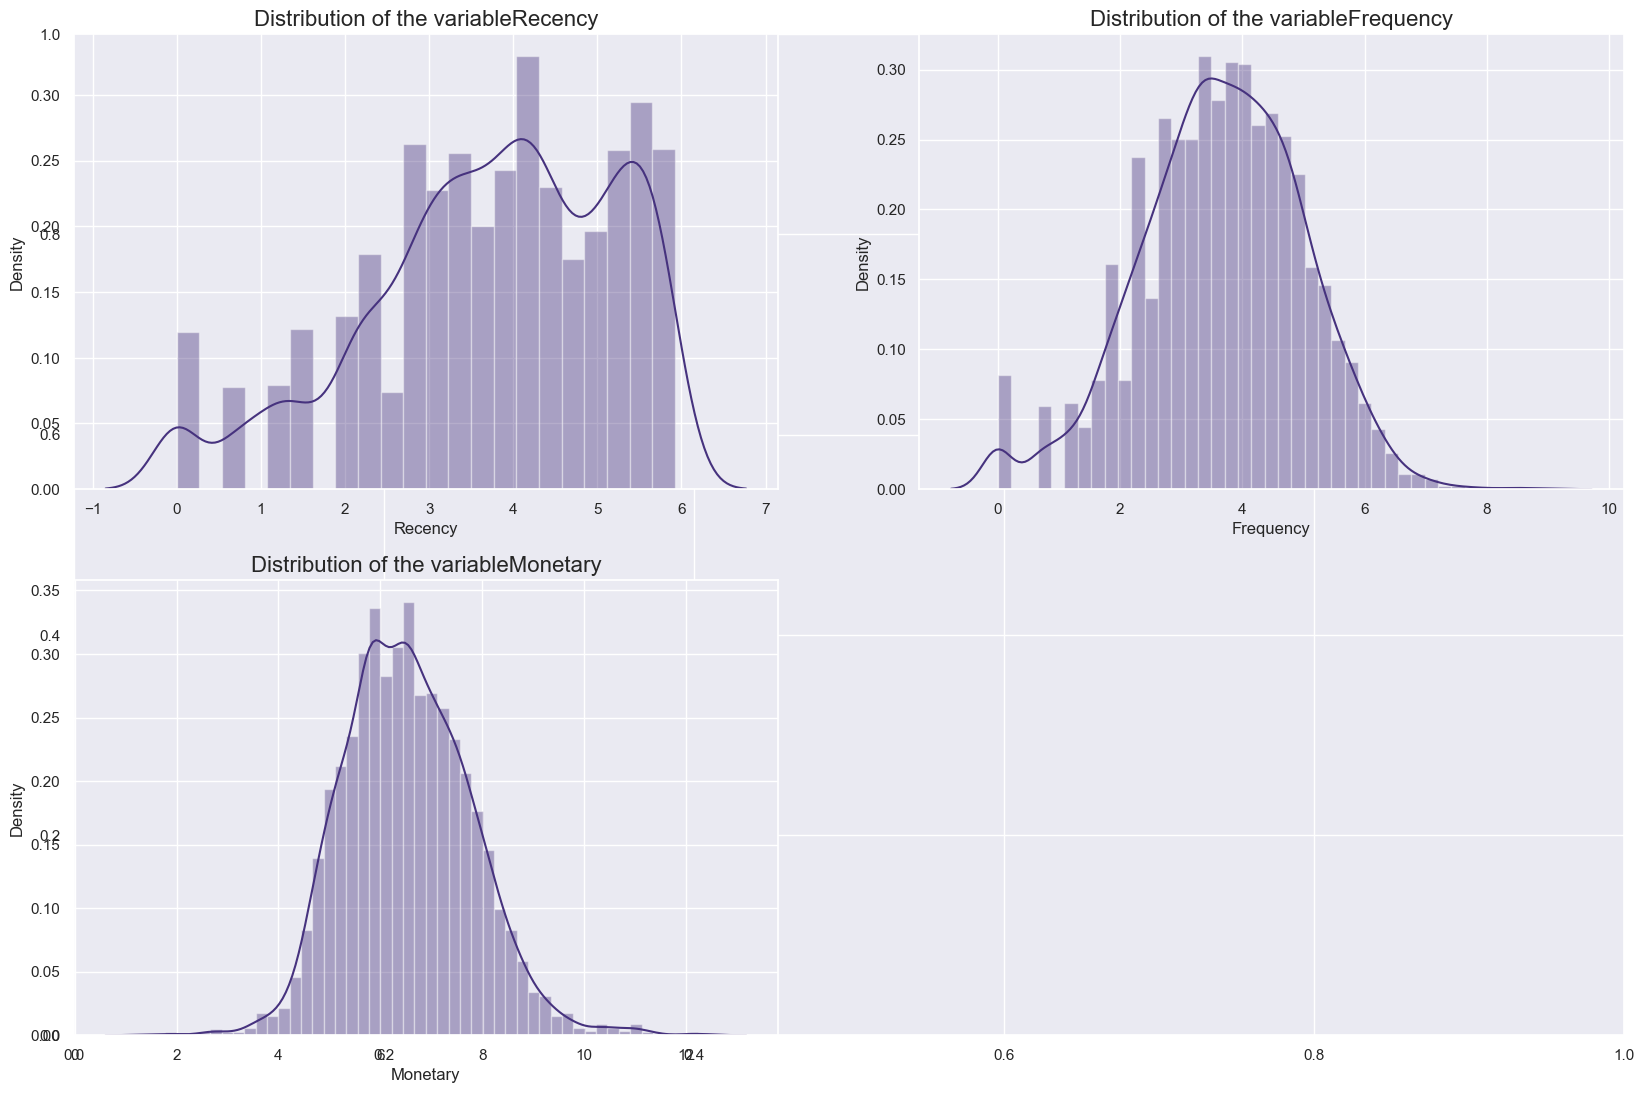

In [56]:
# plot the log transformed distribution
count = 1
plt.subplots(figsize= (20,13))
for feature  in log_df:
    plt.subplot(2,2,count)
    sns.distplot(log_df[feature])
    plt.title(f"Distribution of the variable{feature}", fontsize= 16)
    plt.xlabel(f"{feature}")
    plt.ylabel("Density")
    count  += 1

In [57]:
# apply log transformation on the original rfm dataframe
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [58]:
# display the rfm_df
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942
12747.0,2,103,4196.01,0.693147,4.634729,8.341889
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873
12749.0,3,199,4090.88,1.098612,5.293305,8.316515
12820.0,3,59,942.34,1.098612,4.077537,6.848366


In [59]:
features = ['Recency_log', 'Frequency_log', 'Monetary_log']

# scaling our data
X_features = rfm_df[features].values
scaler =  StandardScaler()
X =  scaler.fit_transform(X_features)

## **Implementing K-Means Clustering:**



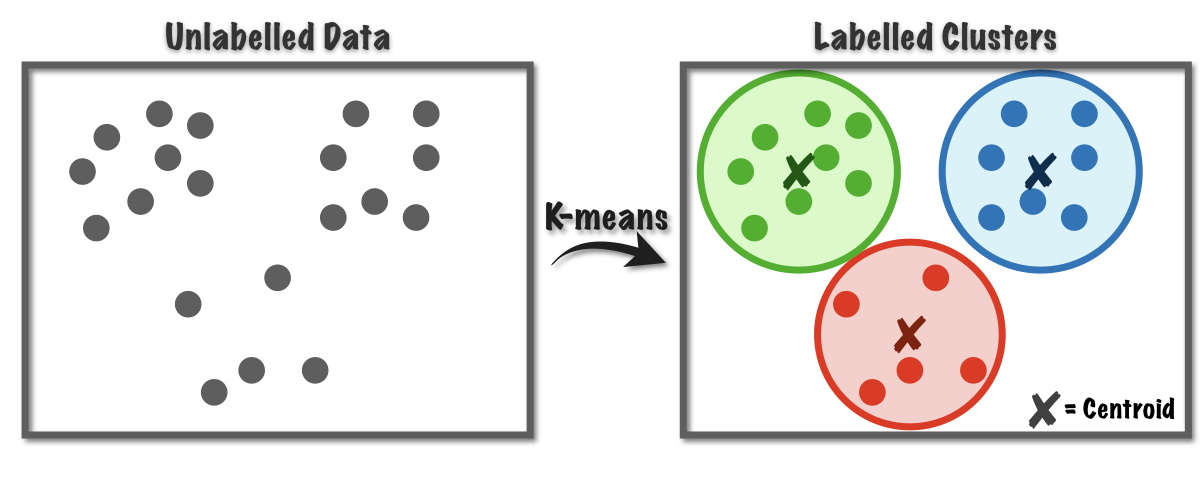

In [60]:
%pip install yellowbrick
import yellowbrick.cluster


Note: you may need to restart the kernel to use updated packages.


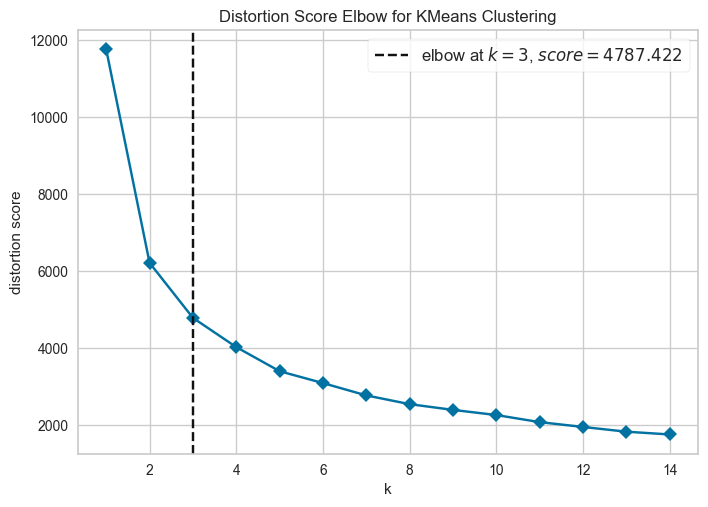

In [61]:
# elbow method to find out the best k
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

SSE = {}
for k in range(1, 15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(X)
    SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1, 15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()


* From the elbow method we reach the conclusion that the optimal number of clusters is 3 for Recency, Frequency and Monetary values.

* We will again run the model with number of clusters as 3.

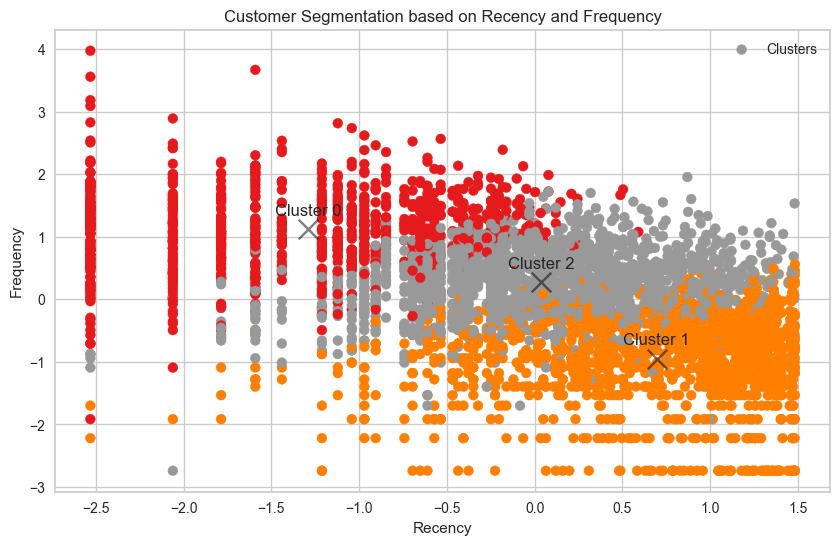

In [62]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your data array
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We can observe three clusters from the KMeans model applied on Recency, Frequency and Monetary data.

### **Interpreting the Clusters with the help of RFM Group:**

In [63]:
# split the rfm values into four quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [64]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [65]:
# calculate RFM segment values for each record
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1
3,12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2


In [66]:
# add RFM group column
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# calculate RFM score from RFM group column
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9
1,12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3
2,12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3
3,12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,111,3
4,12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5


In [67]:
# find the clusters for the observations in the dataset
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,5.783825,0.000000,11.253942,4,4,1,441,9,2
12747.0,2,103,4196.01,0.693147,4.634729,8.341889,1,1,1,111,3,0
12748.0,1,4412,33053.19,0.000000,8.392083,10.405873,1,1,1,111,3,0
12749.0,3,199,4090.88,1.098612,5.293305,8.316515,1,1,1,111,3,0
12820.0,3,59,942.34,1.098612,4.077537,6.848366,1,2,2,122,5,0


In [68]:
# Group by cluster label and calculate mean
cluster_averages = rfm_df.groupby('Cluster').mean()
cluster_averages

TypeError: agg function failed [how->mean,dtype->object]

In [69]:
# Group by cluster label and calculate mean
cluster_averages = rfm_df.groupby('Cluster').mean()
print(cluster_averages)


TypeError: agg function failed [how->mean,dtype->object]

In [70]:
# Select only numeric columns
numeric_columns = rfm_df.select_dtypes(include='number')

# Group by cluster label and calculate mean
cluster_averages = numeric_columns.groupby('Cluster').mean()
print(cluster_averages)


            Recency   Frequency     Monetary  Recency_log  Frequency_log  \
Cluster                                                                    
0         10.912621  258.559466  5933.187633     1.830261       5.151263   
1        165.282744   15.119196   286.190805     4.759947       2.386550   
2         67.853600   69.166969  1199.700365     3.787118       4.012225   

         Monetary_log         R         F         M   RFMScore  
Cluster                                                         
0            8.043445  1.207524  1.288835  1.241505   3.737864  
1            5.410671  3.298683  3.629245  3.564103  10.492030  
2            6.770923  2.425287  2.156685  2.198427   6.780399  


In [71]:
# Assuming rfm_df contains both numeric and non-numeric columns
numeric_columns = rfm_df.select_dtypes(include=['int', 'float']).columns
cluster_averages = rfm_df.groupby('Cluster')[numeric_columns].mean()


In [72]:
cluster_averages

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMScore,Cluster
Cluster,,,,,,,,,,,
0,10.912621,258.559466,5933.187633,1.830261,5.151263,8.043445,1.207524,1.288835,1.241505,3.737864,0.0
1,165.282744,15.119196,286.190805,4.759947,2.386550,5.410671,3.298683,3.629245,3.564103,10.492030,1.0
2,67.853600,69.166969,1199.700365,3.787118,4.012225,6.770923,2.425287,2.156685,2.198427,6.780399,2.0
